# **Practical Statistics for Data Science & Machine Learning**

Welcome to this course on Practical Statistics! By the end of these modules, you'll have a solid understanding of the statistical concepts most commonly used in Data Science and Machine Learning, and the ability to implement them in Python.

---
## Table of Contents
- [Module 1: Introduction to Statistics & Data Exploration](#module-1)
- [Module 2: Data Visualization & Distributions](#module-2)
- [Module 3: Probability & Sampling](#module-3)
- [Module 4: Hypothesis Testing & Statistical Inference](#module-4)
- [Module 5: Correlation, Regression & Feature Relationships](#module-5)

---

<h2><span style="color:red">🚨 Run the below cell to install required packages and start the timer</span></h2>



In [6]:
# Run this cell to install all required libraries for this course notebook

!pip install numpy pandas matplotlib seaborn scikit-learn scipy statstest-1.0.0-py3-none-any.whl ipywidgets
import time
import threading
import ipywidgets as widgets
from IPython.display import display

timer_out = widgets.Output()
display(timer_out)

def countdown_timer(total_seconds=3600):
    for remaining in range(total_seconds, 0, -1):
        mins, secs = divmod(remaining, 60)
        timeformat = f"{mins:02d}:{secs:02d} remaining"
        with timer_out:
            timer_out.clear_output(wait=True)
            print(timeformat)
        time.sleep(1)
    with timer_out:
        timer_out.clear_output(wait=True)
        print("⏰⏰⏰ TIME IS UP! Please stop and submit your notebook. ⏰⏰⏰")

if '_timer_started' not in globals():
    _timer_started = True
    timer_thread = threading.Thread(target=countdown_timer, args=(3600,))
    timer_thread.start()
else:
    print("Timer has already been started! Do not run this cell again.")


Defaulting to user installation because normal site-packages is not writeable
Processing ./statstest-1.0.0-py3-none-any.whl
statstest is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


60:00 remaining
59:59 remaining
59:58 remaining
59:57 remaining
59:56 remaining
59:55 remaining


<a id='module-1'></a>
# **Module 1: Introduction to Statistics & Data Exploration**

### What is Statistics?
Statistics is the science of collecting, analyzing, interpreting, presenting, and organizing data. It helps us make sense of data and draw conclusions.

### Descriptive vs Inferential Statistics
- **Descriptive Statistics** summarize and describe the features of a dataset (mean, median, etc.).
- **Inferential Statistics** use sample data to make inferences or predictions about a population.

### Types of Data
- **Numerical (Quantitative):** Numbers (e.g., height, salary)
- **Categorical (Qualitative):** Categories/labels (e.g., gender, color)
- **Ordinal:** Categorical data with an order (e.g., rankings)

### Measures of Central Tendency
- **Mean:** Average value
- **Median:** Middle value
- **Mode:** Most frequent value

### Measures of Variability
- **Range:** Difference between max and min
- **Variance:** Average squared deviation from mean
- **Standard Deviation:** Square root of variance; measures spread

Let's explore these concepts with Python!

In [3]:
# Import packages
import numpy as np
import pandas as pd

# Sample dataset
data = {'Age': [23, 45, 12, 36, 28, 52, 33, 41, 25, 39],
        'Salary': [50000, 80000, 12000, 67000, 56000, 90000, 59000, 76000, 51000, 73000],
        'Department': ['HR', 'Engineering', 'Sales', 'Engineering', 'HR', 'Management', 'Sales', 'Engineering', 'HR', 'Management']}

df = pd.DataFrame(data)
df

,Age,Salary,Department
0,23,50000,HR
1,45,80000,Engineering
2,12,12000,Sales
3,36,67000,Engineering
4,28,56000,HR
5,52,90000,Management
6,33,59000,Sales
7,41,76000,Engineering
8,25,51000,HR
9,39,73000,Management


### Central Tendency in Practice

In [2]:
print('Mean Age:', df['Age'].mean())
print('Median Age:', df['Age'].median())
print('Mode Age:', df['Age'].mode()[0])

Mean Age: 33.4
Median Age: 34.5
Mode Age: 12


### Variability in Practice

In [3]:
print('Range of Salary:', df['Salary'].max() - df['Salary'].min())
print('Variance of Salary:', df['Salary'].var())
print('Standard Deviation of Salary:', df['Salary'].std())

Range of Salary: 78000
Variance of Salary: 472933333.3333333
Standard Deviation of Salary: 21747.03044862294


### Data Exploration
Let's check some basic info and summary statistics.

In [ ]:
df.info()
df.describe()

#### Exercises
1. Calculate the mean and median salary for each department. (Store in `mean_salary_by_dept` and `median_salary_by_dept`)
2. What is the mode of the 'Department' column? (Store in `department_mode`)
3. Find the standard deviation of ages for the HR department. (Store in `std_age_hr`)


In [4]:
# STUDENT: Write your answers below using the specified variable names.

# mean_salary_by_dept = ...
# median_salary_by_dept = ...
# department_mode = ...
# std_age_hr = ...
mean_salary_by_dept = df.groupby('Department')['Salary'].mean()
median_salary_by_dept = df.groupby('Department')['Salary'].median()
print(mean_salary_by_dept)
median_salary_by_dept


Department
Engineering    74333.333333
HR             52333.333333
Management     81500.000000
Sales          35500.000000
Name: Salary, dtype: float64


Department
Engineering    76000.0
HR             51000.0
Management     81500.0
Sales          35500.0
Name: Salary, dtype: float64

In [5]:
department_mode = df['Department'].mode()[0]
department_mode

'Engineering'

#### Validate Your Module 1 Solutions
Run the cell below to check your answers for Module 1. The feedback and your score will be displayed.

In [6]:
std_age_hr = df[df['Department'] == 'HR']['Age'].std()
std_age_hr

2.5166114784235836

In [7]:
try:
    from statstest import test
    test.test_module1(df, {
    'mean_salary_by_dept': mean_salary_by_dept,
    'median_salary_by_dept': median_salary_by_dept,
    'department_mode': department_mode,
    'std_age_hr': std_age_hr
})
except:
    print("Try Again!")

Module 1 Score: 4/4
Q1: Mean salary by department correct.
Q2: Median salary by department correct.
Q3: Department mode correct.
Q4: Standard deviation of age in HR correct.



---
<a id='module-2'></a>
# **Module 2: Data Visualization & Distributions**

### Why Visualize Data?
Visualization helps us understand patterns, trends, and outliers in data. It makes complex information accessible and actionable.

### Common Plots
- **Histogram:** Distribution of numeric data
- **Boxplot:** Shows distribution, median, quartiles, and outliers
- **Scatterplot:** Relationship between two numeric variables

### Understanding Distributions
- **Normal Distribution:** Bell-shaped, symmetric
- **Skewed Distribution:** Data leans left or right

Let's visualize!

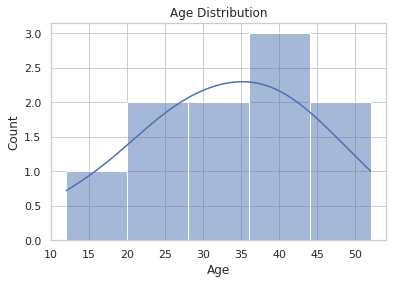

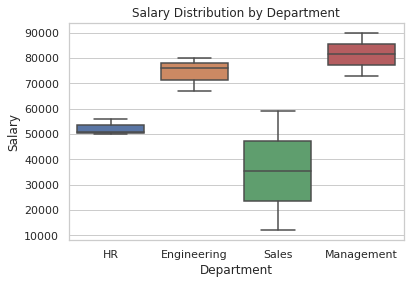

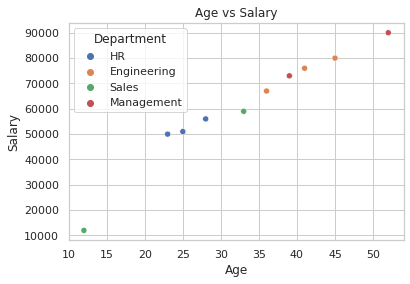

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram of Age
df['Age'] = np.asarray(df["Age"])
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop rows where Age or Salary is missing
df = df.dropna(subset=['Age', 'Salary'])
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Salary by Department
plt.figure(figsize=(6,4))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Scatterplot Age vs Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Department')
plt.title('Age vs Salary')
plt.show()

In [22]:
pip install seaborn==0.11.2 pandas==1.5.3


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 615.3 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
Note: you may need to restart the kernel to use updated packages.


#### Exercises
1. Plot a histogram for Salaries. (Store your matplotlib Figure in `salary_hist_fig`)
2. Create a boxplot for Age by Department. (Store your matplotlib Figure in `age_box_fig`)
3. In a variable `has_outliers`, set to True if you observe any outliers in the boxplot, else False.


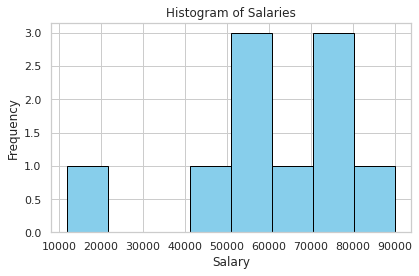

In [15]:
# STUDENT: Write your answers below

# salary_hist_fig = ...
# age_box_fig = ...
# has_outliers = ...
salary_hist_fig = plt.figure()
plt.hist(df['Salary'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

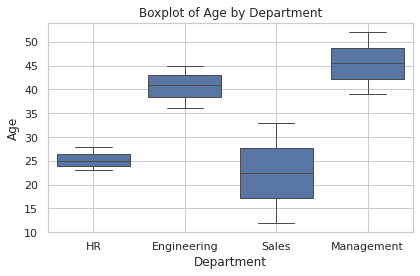

In [16]:
age_box_fig = plt.figure()
sns.boxplot(x='Department', y='Age', data=df)
plt.title('Boxplot of Age by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
has_outliers = True  

#### Validate Your Module 2 Solutions
Run the cell below to check your answers for Module 2. The feedback and your score will be displayed.

In [18]:
try:
    from statstest import test
    test.test_module2(df, {
    'salary_hist_fig': salary_hist_fig,
    'age_box_fig': age_box_fig,
    'has_outliers': has_outliers
})
except:
    print("Try Again!")

Module 2 Score: 3/3
Q1: Salary histogram figure present.
Q2: Age boxplot figure present.
Q3: Outlier detection variable present.



---
<a id='module-3'></a>
# **Module 3: Probability & Sampling**

### What is Probability?
Probability measures the likelihood of an event occurring, between 0 (impossible) and 1 (certain).

### Probability Distributions
- **Normal Distribution:** Most data falls near the mean
- **Binomial Distribution:** Number of successes in fixed trials (e.g., coin toss)
- **Uniform Distribution:** All outcomes equally likely

### Sampling
- **Random Sampling:** Every data point has equal chance
- **Stratified Sampling:** Data divided into subgroups, samples taken from each

### Central Limit Theorem (CLT)
CLT states that the sampling distribution of the sample mean approaches a normal distribution, as the sample size increases, regardless of the original distribution.

Let's simulate some probabilities!

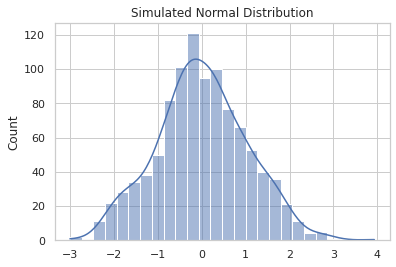

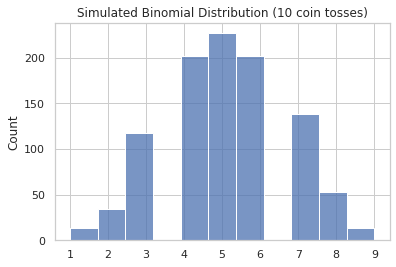

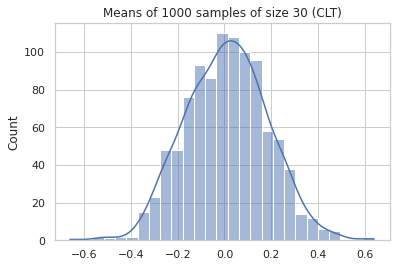

In [7]:


from scipy.stats import norm, binom
import seaborn as sns
import matplotlib.pyplot as plt

# Normal Distribution
mu, sigma = 0, 1
data_norm = np.random.normal(mu, sigma, 1000)
plt.figure(figsize=(6,4))
sns.histplot(data_norm, kde=True)
plt.title('Simulated Normal Distribution')
plt.show()

# Binomial Distribution (e.g. 10 coin tosses, p=0.5)
n, p = 10, 0.5
data_binom = binom.rvs(n, p, size=1000)
plt.figure(figsize=(6,4))
sns.histplot(data_binom, kde=False, bins=n+1)
plt.title('Simulated Binomial Distribution (10 coin tosses)')
plt.show()

# Central Limit Theorem: mean of random samples
means = [np.mean(np.random.choice(data_norm, 30)) for _ in range(1000)]
plt.figure(figsize=(6,4))
sns.histplot(means, kde=True)
plt.title('Means of 1000 samples of size 30 (CLT)')
plt.show()




#### Exercises
1. Simulate and plot a uniform distribution of 1000 values in [0,1]. (Store the array as `uniform_data` and the figure as `uniform_fig`)
2. Try changing the parameters of the binomial distribution (n, p). What do you observe? (Store a short answer string in `binom_observation`)
3. In a variable `clt_reason`, explain briefly why the CLT matters in machine learning (as a string).


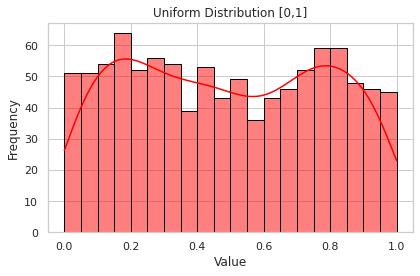

In [9]:
# STUDENT: Write your answers below

# uniform_data = ...
# uniform_fig = ...
# binom_observation = ...
# clt_reason = ...

uniform_data = np.random.uniform(0, 1, 1000)

uniform_fig = plt.figure()
sns.histplot(uniform_data, bins=20,kde=True, color='red', edgecolor='black')
plt.title('Uniform Distribution [0,1]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

In [21]:
binom_observation = (
    "As n increases and p stays small, the distribution becomes more symmetric. "
    "With small n or extreme p (close to 0 or 1), the distribution becomes skewed."
)


In [22]:
clt_reason = (
    "The CLT explains why the sampling distribution of the mean becomes approximately normal "
    "for large sample sizes, regardless of the original distribution. This allows ML models to use "
    "normal-based methods and makes statistical inference more reliable."
)

#### Validate Your Module 3 Solutions
Run the cell below to check your answers for Module 3. The feedback and your score will be displayed.

In [23]:
try:
    from statstest import test
    test.test_module3(df, {
    'uniform_data': uniform_data,
    'uniform_fig': uniform_fig,
    'binom_observation': binom_observation,
    'clt_reason': clt_reason
})
except:
    print("Try Again!")

Module 3 Score: 4/4
Q1: Uniform distribution simulation correct.
Q2: Uniform distribution figure present.
Q3: Binomial observation answer present.
Q4: CLT reason answer present.



---
<a id='module-4'></a>
# **Module 4: Hypothesis Testing & Statistical Inference**

### What is Hypothesis Testing?
A method to decide whether there is enough evidence to reject a hypothesis about a population.

### Steps in Hypothesis Testing
1. State the null (H0) and alternative (H1) hypotheses
2. Choose a significance level (alpha, e.g., 0.05)
3. Calculate a test statistic
4. Find the p-value
5. Reject or fail to reject H0

### Common Tests
- **t-test:** Compare means of two groups
- **Chi-square test:** Compare categorical variables
- **ANOVA:** Compare means of more than two groups

Let's practice with Python!

In [24]:
from scipy import stats

# Example: Is the mean salary in Engineering different from HR?
eng_salary = df[df['Department'] == 'Engineering']['Salary']
hr_salary = df[df['Department'] == 'HR']['Salary']

t_stat, p_val = stats.ttest_ind(eng_salary, hr_salary)
print('t-statistic:', t_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject the null hypothesis (means are different)')
else:
    print('Fail to reject the null hypothesis (means are similar)')

t-statistic: 5.153734142323998
p-value: 0.006727071309846925
Reject the null hypothesis (means are different)


#### Exercises
1. Test if the mean age is different between Management and Sales departments (store p-value as `p_age_mgmt_sales` and True/False in `age_diff_significant` for p<0.05).
2. What does it mean if the p-value is less than 0.05? (Store in `pval_meaning` string)
3. Try a chi-square test for the relationship between Department and whether Salary > 60000. Store the p-value as `p_chi2`.


In [25]:
# STUDENT: Write your answers below

# p_age_mgmt_sales = ...
# age_diff_significant = ...
# pval_meaning = ...
# p_chi2 = ..
from scipy import stats

# 1. t-test for age difference between Management and Sales
ages_mgmt = df[df['Department'] == 'Management']['Age']
ages_sales = df[df['Department'] == 'Sales']['Age']
t_stat, p_age_mgmt_sales = stats.ttest_ind(ages_mgmt, ages_sales, equal_var=False)  
age_diff_significant = p_age_mgmt_sales < 0.05
print(p_age_mgmt_sales)
age_diff_significant


0.2280729428298039


False

In [26]:
pval_meaning = (
    "If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference."
)
pval_meaning

'If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference.'

In [27]:
df['High_Salary'] = df['Salary'] > 60000
contingency_table = pd.crosstab(df['Department'], df['High_Salary'])
chi2_stat, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
p_chi2

0.01856613546304325

#### Validate Your Module 4 Solutions
Run the cell below to check your answers for Module 4. The feedback and your score will be displayed.

In [28]:
try:
    from statstest import test
    test.test_module4(df, {
    'p_age_mgmt_sales': p_age_mgmt_sales,
    'age_diff_significant': age_diff_significant,
    'pval_meaning': pval_meaning,
    'p_chi2': p_chi2
})
except:
    print("Try Again!")

Module 4 Score: 4/4
Q1: p-value for age difference present and valid.
Q2: Significance variable present.
Q3: p-value meaning answer present and mentions 'reject'.
Q4: Chi-square p-value present and valid.



---
<a id='module-5'></a>
# **Module 5: Correlation, Regression & Feature Relationships**

### Correlation
Correlation measures how two variables move together.
- **Pearson correlation:** Linear relationship (-1 to +1)
- **Spearman correlation:** Monotonic relationship (not necessarily linear)

### Linear Regression
A method to model the relationship between a dependent variable and one or more independent variables.

- **Simple Linear Regression:** One input, one output
- **Overfitting/Underfitting:** Too complex/simple models can hurt predictions

Let's try them in Python!

Correlation matrix:
              Age    Salary
Age     1.000000  0.970343
Salary  0.970343  1.000000
Regression Coefficient (slope): 1796.0399227301991
Intercept: 1412.2665808113525


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

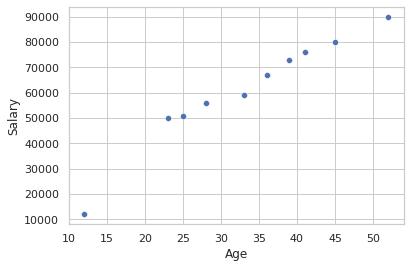

In [29]:
# Correlation
corr = df[['Age', 'Salary']].corr()
print('Correlation matrix:\n', corr)

# Simple Linear Regression: Predict Salary from Age
from sklearn.linear_model import LinearRegression

X = df[['Age']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)

print('Regression Coefficient (slope):', model.coef_[0])
print('Intercept:', model.intercept_)

# Plot the regression
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.plot(df['Age'], model.predict(X), color='red')
plt.title('Linear Regression: Salary vs Age')
plt.show()

#### Exercises
1. Calculate the Spearman correlation between Age and Salary (store as `spearman_corr`).
2. Fit a regression model to predict Salary from both Age and a dummy variable for Department. Store the regression coefficients (as a list) in `regression_coefs`.
3. What does a negative correlation mean in this context? (Store in `neg_corr_meaning` as a string).


In [4]:
# STUDENT: Write your answers below

# spearman_corr = ...
# regression_coefs = ...
# neg_corr_meaning = ...
import pandas as pd
from scipy.stats import spearmanr
import statsmodels.api as sm

# Drop rows with missing data in relevant columns
df = df.dropna(subset=['Age', 'Salary', 'Department'])

# Ensure numeric types for Age and Salary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df = df.dropna(subset=['Age', 'Salary'])

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(df['Age'], df['Salary'])

# Create dummy variables and ensure they are floats
department_dummies = pd.get_dummies(df['Department'], drop_first=True).astype(float)

# Prepare features
X = pd.concat([df['Age'], department_dummies], axis=1)
X = sm.add_constant(X)

# Response variable
y = df['Salary']

# Fit regression model
model = sm.OLS(y, X).fit()

# Extract coefficients as list
regression_coefs = model.params.tolist()

# Explanation for negative correlation
neg_corr_meaning = ("A negative correlation between Age and Salary means that, in this dataset, "
                    "as Age increases, Salary tends to decrease, or vice versa, "
                    "indicating an inverse relationship between the two variables.")



#### Validate Your Module 5 Solutions
Run the cell below to check your answers for Module 5. The feedback and your score will be displayed.

In [31]:
try:
    from statstest import test
    test.test_module5(df, {
    'spearman_corr': spearman_corr,
    'regression_coefs': regression_coefs,
    'neg_corr_meaning': neg_corr_meaning
})
except:
    print("Try Again!")

Module 5 Score: 3/3
Q1: Spearman correlation present and valid.
Q2: Regression coefficients present and valid.
Q3: Negative correlation meaning answer present and mentions 'decrease'.



---
## Final Score and Feedback
After completing all modules and their validations, run the cell below to get your detailed feedback and final score!

In [32]:
from statstest import feedback
feedback.show_final_feedback()

======== DETAILED FEEDBACK ========
Module 1 Feedback:
   Q1: Mean salary by department correct.
   Q2: Median salary by department correct.
   Q3: Department mode correct.
   Q4: Standard deviation of age in HR correct.

Module 2 Feedback:
   Q1: Salary histogram figure present.
   Q2: Age boxplot figure present.
   Q3: Outlier detection variable present.

Module 3 Feedback:
   Q1: Uniform distribution simulation correct.
   Q2: Uniform distribution figure present.
   Q3: Binomial observation answer present.
   Q4: CLT reason answer present.

Module 4 Feedback:
   Q1: p-value for age difference present and valid.
   Q2: Significance variable present.
   Q3: p-value meaning answer present and mentions 'reject'.
   Q4: Chi-square p-value present and valid.

Module 5 Feedback:
   Q1: Spearman correlation present and valid.
   Q2: Regression coefficients present and valid.
   Q3: Negative correlation meaning answer present and mentions 'decrease'.

FINAL SCORE: 18/18
Excellent work! All a